### Covid19 cases and Climate in Germany 

This notebook seeks to rudimentarily explore the relationship between coronavirus cases in Germany and the temperature and humidity in the corresponding regions. 

According to the WHO, a number of environmental factors can influence the spread of communicable diseases that can cause epidemics. The most important of these are:
1. Water supply
2. Sanitation facilities
3. Food
4. Climate

The underlying theory is the number of cases and the spread of previous infectious viruses demonstrate seasonal patterns, affected by climate, and so Covid19 should display similarity in this aspect. Plainly speaking, temperature and humidity, changed throughout seasons, have an effect on the number of virus contraction incidents. 

The following is a naive estimate of this relationship based on the number of confirmed cases in Germany as of March 15th, 2020 and the temperature and humidity of its regions. 

In [1]:
import pandas as pd
from statsmodels.regression.linear_model import OLS
import numpy as np
import seaborn as sns

In [2]:
os.chdir('/Users/dangngochuy/Desktop/Hertie/Thesis/Covid19_vs_Climate/data')
df = pd.read_excel('Germany.xlsx', index_col=0)
df

<IPython.core.display.Javascript object>

,2020-03-16 00:00:00,2020-03-15 00:00:00,2020-03-03 00:00:00,Min,Max,Humidity,Wind
North Rhine-Westphalia,2744,2493,111,7,15,66,NaN
Baden-Wuerttemberg,1105,977,44,-1,15,64,NaN
Bavaria,1067,886,48,-4,14,70,NaN
Lower Saxony,391,287,4,4,14,59,NaN
Berlin,342,283,6,0,12,46,NaN
Hesse,332,282,12,3,14,62,NaN
Rhineland-Palatinate,325,200,2,3,14,62,NaN
Hamburg,260,196,2,3,14,61,24.0
Saxony,152,134,1,1,9,42,25.0
Schleswig-Holstein,123,123,2,6,13,65,22.0


In [3]:
#Create new dataframe with desired columns 
y = np.log(df.iloc[:, 0]) #take log of number of cases
y.name = 'Infected cases' 

#Temperature and Humidity parameter to toggle
temp = 16
humid = 75

#create features with max temperature - 15 and humidity - 75
x = df[['Max', 'Humidity']].sub([temp, humid])  
x.columns = ['Temp - 16oC', 'Humidity - 75%']

germany_df = pd.merge(left = x, right = y, left_on= x.index, right_on= y.index)
germany_df

,key_0,Temp - 16oC,Humidity - 75%,Infected cases
0,North Rhine-Westphalia,-1,-9,7.917172
1,Baden-Wuerttemberg,-1,-11,7.007601
2,Bavaria,-2,-5,6.972606
3,Lower Saxony,-2,-16,5.968708
4,Berlin,-4,-29,5.834811
5,Hesse,-2,-13,5.805135
6,Rhineland-Palatinate,-2,-13,5.783825
7,Hamburg,-2,-14,5.560682
8,Saxony,-7,-33,5.023881
9,Schleswig-Holstein,-3,-10,4.812184


In [4]:
target = germany_df.loc[:,'Infected cases']
features = germany_df.loc[:, 'Temp - 16oC':'Humidity - 75%']

In [5]:
#Estimate relationship with naive OLS

result = OLS(target, features, hasconst=False).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:         Infected cases   R-squared (uncentered):                   0.721
Model:                            OLS   Adj. R-squared (uncentered):              0.681
Method:                 Least Squares   F-statistic:                              18.09
Date:                Tue, 17 Mar 2020   Prob (F-statistic):                    0.000131
Time:                        09:27:27   Log-Likelihood:                         -39.786
No. Observations:                  16   AIC:                                      83.57
Df Residuals:                      14   BIC:                                      85.12
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [12]:
#Interpret log-transformation in linear model for humidity
#For every one-unit increase in the independent variable, the number of covid-19 cases decreases by about 15%.

humid_effect = (np.exp(result.params[1]) - 1) * 100
humid_effect

-15.807766822926494

In [14]:
#Interpret log-transformation in linear model for temperature
#For every one-unit increase in the independent variable, the number of covid-19 cases decreases by about 42%.

temp_effect = (np.exp(result.params[0]) - 1) * 100
temp_effect

-42.72305805787864

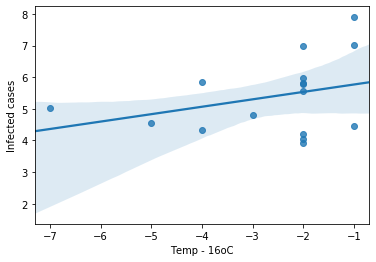

In [8]:
#Scatter plot between the number of cases and temperature 

sns.regplot(x=features.iloc[:,0], y=target, data=germany_df)

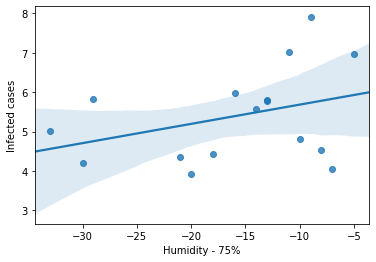

In [9]:

sns.regplot(x=features.iloc[:,1], y=target, data=germany_df)

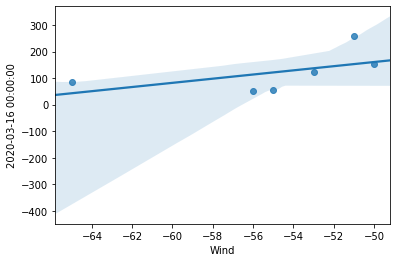

In [10]:
sns.regplot(x=(df.iloc[:,-1]-75), y=df.iloc[:,0], data=df)


In [11]:
df.iloc[-3, 2] = 1
y = np.log(df.iloc[:, 0]/df.iloc[:, 2])
y.name = 'Growth rate'
res = OLS(y, x, hasconst=False).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:            Growth rate   R-squared (uncentered):                   0.858
Model:                            OLS   Adj. R-squared (uncentered):              0.837
Method:                 Least Squares   F-statistic:                              42.19
Date:                Tue, 17 Mar 2020   Prob (F-statistic):                    1.18e-06
Time:                        09:27:28   Log-Likelihood:                         -29.611
No. Observations:                  16   AIC:                                      63.22
Df Residuals:                      14   BIC:                                      64.77
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------